In [1]:
from prose import blocks, Sequence
from prose.tutorials import example_image

# our example image
image = example_image()

# Sequence to build image PSF
sequence = Sequence([
    blocks.SegmentedPeaks(),  # stars detection
    blocks.Cutouts(),
    blocks.MedianPSF(),       # building PSF
])

sequence.run([image])

RUN   0%|                                             | 0/1 [00:00<?, ?images/s]

RUN 100%|█████████████████████████████████████| 1/1 [00:00<00:00, 22.16images/s]

In [2]:
import matplotlib.pyplot as plt

block = blocks.psf.Gaussian2D()
image = block(image)

model: Gaussian2D
fwhmx, fwhmy, theta: 3.78, 3.61, -1.02


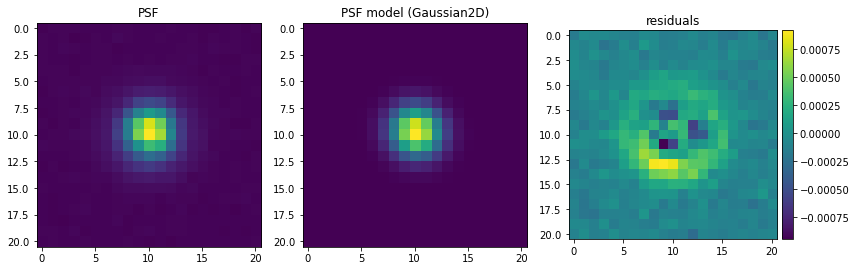

In [3]:
from prose import viz

print(f"model: {image.psf_model_block}")
print("fwhmx, fwhmy, theta: " + ", ".join([f"{p:.2f}" for p in block.fwhm(image.psf_models_params)]))

plt.figure(figsize=(12, 5))

plt.subplot(131)
plt.imshow(image.psf)
plt.title("PSF")

plt.subplot(132)
plt.imshow(image.psf_model)
plt.title(f"PSF model ({image.psf_model_block})")

plt.subplot(133)
residuals = image.psf - image.psf_model
ax = plt.imshow(residuals)
plt.title("residuals")
viz.add_colorbar(ax)

plt.tight_layout()